<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import h5py
%matplotlib inline

## Load Data

In [56]:
f = h5py.File("sample16.h5", mode="r")

In [57]:
print (*f)

sample16


In [58]:
print (*f.keys())

sample16


In [59]:
f = np.array([*f["sample16"]])

In [60]:
f.shape

(16, 128, 128, 128)

In [61]:
## get the delta_HI mass 
## in the coordinates 
## x = 0/128
## y = 0/128
## z = 0/128
## of the 0th cube
f[0][0][0][0]

1.1136686

## Visualize

0
(18, 18, 18)


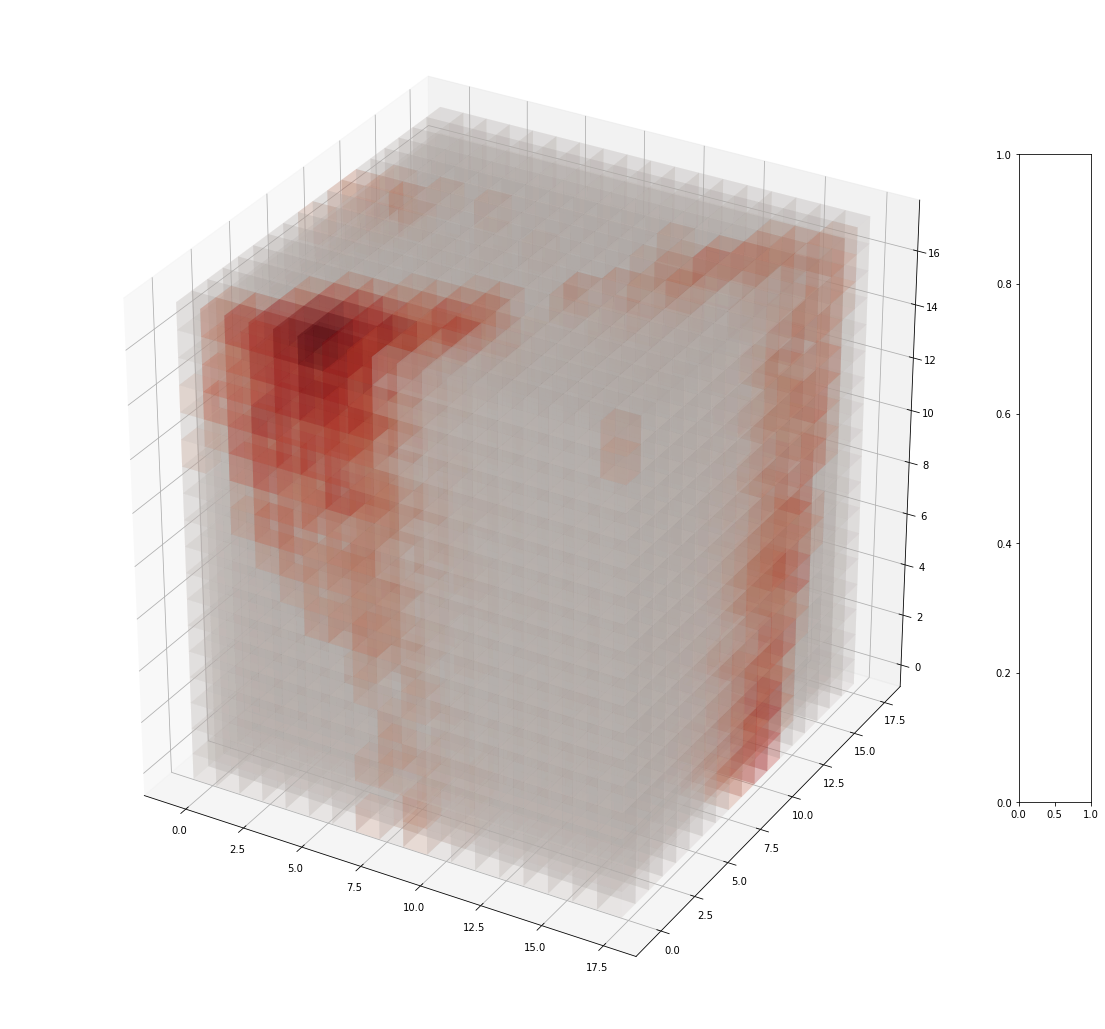

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors

def cuboid_data(center, size=(1,1,1)):
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return x, y, z

def plotCubeAt(pos=(0,0,0),
               c="w", 
               alpha=0.1, 
               ax=None):
    # Plotting N cube elements at position pos
    if ax !=None:
        X, Y, Z = cuboid_data((pos[0],pos[1],pos[2]))
        ax.plot_surface(np.array(X),
                        np.array(Y),
                        np.array(Z),
                        color=c, 
                        rstride=1, 
                        cstride=1, 
                        alpha=alpha)

def plotMatrix(ax, x, y, z, data, 
               cmap="Reds", 
               cax=None, 
               alpha=0.1):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), 
                                       vmax=data.max())
    
    colors = lambda i,j,k : matplotlib.cm.ScalarMappable(norm=norm,
                                                         cmap=cmap).to_rgba(data[i,j,k]) 
    for i, xi in enumerate(x):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    plotCubeAt(pos=(xi, yi, zi), 
                               c=colors(i,j,k),
                               alpha=alpha,
                               ax=ax)



    if cax !=None:
        cbar = matplotlib.colorbar.ColorbarBase(cax, 
                                                cmap=cmap,
                                                norm=norm,
                                                orientation='vertical')  
        cbar.set_ticks(np.unique(data))
        # set the colorbar transparent as well
        cbar.solids.set(alpha=alpha)              



if __name__ == '__main__':
    cube_size = 18
    random_cube_index = 0
    # x and y and z coordinates
    x = np.array([*range(cube_size)]) ## convert to changeable
    y = np.array([*range(cube_size)]) ## convert to changeable
    z = np.array([*range(cube_size)]) ## convert to changeable
#     data_value = f[0][:16,:16,:16]
    data_value = f[0][random_cube_index:random_cube_index+cube_size,
                      random_cube_index:random_cube_index+cube_size,
                      random_cube_index:random_cube_index+cube_size]
    
    mask = data_value>2
    mask = mask.astype(np.int)
    data_value = np.multiply(data_value,mask)
    
    print (random_cube_index)
    print (data_value.shape)

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
    ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
    ax.set_aspect('equal')
    
    plotMatrix(ax, np.array(x),
               np.array(y),
               np.array(z),
               data_value, cmap="Reds")

    plt.show()